In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams.update({'figure.autolayout': True})

In [2]:
# Read the results of all the experiments.
xxs = pd.read_csv('cenlab-xxs-log.txt')
xy = pd.read_csv('cenlab-xy-log.txt')
idx = pd.read_csv('cenlab-index.csv')
matches = pd.read_csv('cenlab-txtmatcher-log.txt')
classical = pd.read_csv('classical-log.txt')

# Merge all the results and the index. 
df = pd.merge(idx, matches, on='filename', how='outer')
df = pd.merge(df, xxs, on='filename', how='outer')
df = pd.merge(df, xy, on='filename', how='outer')
df = pd.merge(df, classical, on='filename', how='outer')

In [3]:
# Get rid of unnecessary columns. 
for column in ['Unnamed: 0', 'threshold', 'ngrams']: 
    df.drop(column, axis=1, inplace=True)
    
df = df.fillna(0) # Missing values means a value of zero. 
df['xxs-ratio'] = ( df['xxs'] / df['words'] ) 

# Adjust for text word count.
df['matches-ratio'] = ( df['score'] / df['words'] ) 
df['xy-ratio'] = df['xy'] # XY is already a ratio. 
df['clas-ratio'] = df['classical'] / df['words'] 

# Organize by date. 
df = df.sort_values(by='date').set_index('date')

In [4]:
# Remove outliers. 
xyOutliers = df.loc[df['xy']>100]
xxsOutliers = df.loc[df['xxs']>10]
clasOutliers = df.loc[df['classical']>150]

dfb = df.loc[df['xy']<90]
dfb = dfb.loc[dfb['xxs']<10]
dfb = dfb.loc[dfb['classical']<150]

In [5]:
xyOutliers

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio
date,,,,,,,,,,,,,,,
1786,William Beckford,1786_Beckford_William_Vathek_Novel.txt,m,b,Vathek,36089.0,n,0.0,0.0,127.0,1,0.000000,0.000000,127.0,0.000028
1838,Harriet Martineau,1838_Martineau_Harriet_Deerbrook_Novel.txt,f,b,Deerbrook,220828.0,n,0.0,1.0,232.0,1,0.000005,0.000000,232.0,0.000005
1843,George Borrow,1843_Borrow_George_TheBibleinSpain_Novel.txt,m,b,The Bible in Spain,220514.0,n,3.0,0.0,1052.0,12,0.000000,0.000014,1052.0,0.000054
1847,Charlotte Bronte,1847_Bronte_Charlotte_JaneEyre_Novel.txt,f,b,Jane Eyre,184441.0,n,8.0,0.0,190.0,6,0.000000,0.000043,190.0,0.000033
1862,George Eliot,1862_Eliot_George_Romola_Novel.txt,f,b,Romola,226661.0,n,3.0,0.0,562.0,87,0.000000,0.000013,562.0,0.000384
1918,Sinclair Lewis,1918_Lewis_Sinclai_TheJob_Nove.txt,m,a,The Job,90518.0,n,0.0,1.0,127.0,2,0.000011,0.000000,127.0,0.000022


In [6]:
xxsOutliers

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio
date,,,,,,,,,,,,,,,
1885,Francis Marion Crawford,1885 zoroaster.txt,m,a,Zoroaster,77310.0,n,0.0,19.0,1.411765,2,0.000246,0.000000,1.411765,0.000026
1918,Gilbert Parker,1918 the world for sale.txt,m,c,The World for Sale,103899.0,n,2.0,46.0,0.660241,4,0.000443,0.000019,0.660241,0.000038


In [7]:
clasOutliers

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio
date,,,,,,,,,,,,,,,
1836,Lydia Child,1836_Child_Lydia_Philothea_Novel.txt,f,a,Philothea,73040.0,n,1.0,1.0,4.387597,410,0.000014,0.000014,4.387597,0.005613
1853,Charles Kingsley,1853_Kingsley_Charles_Hypatia_Novel.txt,m,b,Hypatia,162593.0,n,6.0,8.0,1.222785,277,0.000049,0.000037,1.222785,0.001704
1904,Edith Nesbit,1904 the phoenix and the carpet.txt,f,b,The Phoenix and the Carpet,62117.0,n,0.0,0.0,0.346405,375,0.000000,0.000000,0.346405,0.006037


In [8]:
df['xy-ratio'].max(), df['xxs-ratio'].max(), df['matches-ratio'].max()

(1052.0, 0.00044273765868776407, 0.00012025879693099551)

In [9]:
df['biblical'] = ( df['matches-ratio'] + df['xxs-ratio'] + df['xy-ratio'] ) / 3
dfb['biblical'] = ( dfb['matches-ratio'] + dfb['xxs-ratio'] + dfb['xy-ratio'] ) / 3

In [12]:
df.sort_values(by='clas-ratio', ascending=False)

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio,biblical
date,,,,,,,,,,,,,,,,
1904,Edith Nesbit,1904 the phoenix and the carpet.txt,f,b,The Phoenix and the Carpet,62117.0,n,0.0,0.0,0.346405,375,0.000000,0.000000,0.346405,0.006037,0.115468
1836,Lydia Child,1836_Child_Lydia_Philothea_Novel.txt,f,a,Philothea,73040.0,n,1.0,1.0,4.387597,410,0.000014,0.000014,4.387597,0.005613,1.462541
1800,Maria Edgeworth,1800_Edgeworth_Maria_CastleRackrent_Novel.txt,f,b,Castle Rackrent,35653.0,n,0.0,0.0,0.780822,88,0.000000,0.000000,0.780822,0.002468,0.260274
1915,Kate Douglas Wiggin,1915 penelope's postscripts.txt,f,a,Penelope’s Postscripts,30283.0,n,0.0,0.0,1.129032,59,0.000000,0.000000,1.129032,0.001948,0.376344
1853,Charles Kingsley,1853_Kingsley_Charles_Hypatia_Novel.txt,m,b,Hypatia,162593.0,n,6.0,8.0,1.222785,277,0.000049,0.000037,1.222785,0.001704,0.407624
1901,George Gissing,1901 our friend the charlatan.txt,m,b,Our Friend the Charlatan,132161.0,n,3.0,0.0,0.551282,148,0.000000,0.000023,0.551282,0.001120,0.183768
1904,Irving Bacheller,1904 vergilius.txt,m,a,Vergilius,41577.0,n,5.0,0.0,22.400000,42,0.000000,0.000120,22.400000,0.001010,7.466707
1883,Mary Braddon,1883_Braddon_Mary_TheGoldenCalf_Novel.txt,f,b,The Golden Calf,160165.0,n,0.0,3.0,0.444050,141,0.000019,0.000000,0.444050,0.000880,0.148023
1906,Gertrude Atherton,1906 rezanov.txt,f,a,Rezanov,64836.0,n,0.0,0.0,2.569767,55,0.000000,0.000000,2.569767,0.000848,0.856589


In [11]:
df.loc[df.index==1888]

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio,biblical
date,,,,,,,,,,,,,,,,
1888,Frances Eleanor Trollope,1888_Trollope_FrancesEleanor_ThatUnfortunateMa...,f,b,That Unfortunate Marriage,167880.0,n,1.0,0.0,0.312073,5,0.000000,0.000006,0.312073,0.000030,0.104026
1888,Mrs. Humphry Ward,1888_Ward_Mrs.Humphry_RobertElsmere_Novel.txt,f,b,Robert Elsmere,286424.0,n,2.0,3.0,0.714126,18,0.000010,0.000007,0.714126,0.000063,0.238048
1888,Mrs. Humphrey Ward,1888 robert elsmere.txt,f,b,Robert Elsmere,287990.0,n,2.0,3.0,0.662150,18,0.000010,0.000007,0.662150,0.000063,0.220722
1888,George Augustus Moore,1888 confessions of a young man.txt,m,b,Confessions of a Young Man,59560.0,n,0.0,2.0,1.326733,18,0.000034,0.000000,1.326733,0.000302,0.442255
1888,Henry Rider Haggard,1888 mr meeson's will.txt,m,b,Mr Meeson’s Will,67617.0,n,0.0,0.0,0.682635,4,0.000000,0.000000,0.682635,0.000059,0.227545
1888,Gertrude Atherton,1888 what dreams may come.txt,f,a,What Dreams May Come,44409.0,n,0.0,0.0,1.092593,2,0.000000,0.000000,1.092593,0.000045,0.364198
1888,Arthur Conan Doyle,1888 a study in scarlet.txt,m,b,A Study in Scarlet,43542.0,n,0.0,0.0,1.000000,0,0.000000,0.000000,1.000000,0.000000,0.333333
1888,George Gissing,1888 a life's morning.txt,m,b,A Life’s Morning,141730.0,n,0.0,0.0,0.510903,0,0.000000,0.000000,0.510903,0.000000,0.170301
1888,George Augustus Moore,1888 spring days.txt,m,b,Spring Days,99088.0,n,0.0,0.0,0.435233,2,0.000000,0.000000,0.435233,0.000020,0.145078


In [8]:
# Normalize data
def normalize(df): 
    for column in ['xy-ratio', 'matches-ratio', 'xxs-ratio', 'clas-ratio', 'biblical']: 
        df[column] = df[column] / ( df[column].max() )
        
#normalize(df)
#normalize(dfb)

In [9]:
df['xy-ratio'].max(), df['xxs-ratio'].max(), df['matches-ratio'].max()

(1052.0, 0.00044273765868776407, 0.00012025879693099551)

In [10]:
dfb.loc[dfb['xy'] == dfb['xy'].max()]

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio,biblical
date,,,,,,,,,,,,,,,,
1885,Amelia Barr,1885_Barr_Amelia_JanVeeder'sWife_Novel.txt,f,b,Jan Veeder's Wife,64733.0,n,4.0,0.0,84.0,1,0.0,0.000062,84.0,0.000015,28.000021
1890,Kate Chopin,1890_Chopin_Kate_AtFault_Novel.txt,f,a,At Fault,57557.0,n,0.0,0.0,84.0,1,0.0,0.000000,84.0,0.000017,28.000000


In [11]:
df

,author,filename,gender,nationality,title,words,modernist,score,xxs,xy,classical,xxs-ratio,matches-ratio,xy-ratio,clas-ratio,biblical
date,,,,,,,,,,,,,,,,
1771,Henry Mackenzie,1771_Mackenzie_Henry_TheManofFeeling_Novel.txt,m,b,The Man of Feeling,36734.0,n,0.0,0.0,39.000000,0,0.000000,0.000000,39.000000,0.000000,13.000000
1771,Tobias Smollett,1771_Smollett_Tobias_TheExpedictionofHenryClin...,m,b,The Expediction of Henry Clinker,148355.0,n,1.0,0.0,3.187919,10,0.000000,0.000007,3.187919,0.000067,1.062642
1778,Fanny Burney,1778_Burney_Fanny_Evelina_Novel.txt,f,b,Evelina,154238.0,n,0.0,0.0,0.956522,7,0.000000,0.000000,0.956522,0.000045,0.318841
1782,Fanny Burney,1782_Burney_Fanny_Cecilia_Novel.txt,f,b,Cecilia,329151.0,n,0.0,0.0,2.176030,10,0.000000,0.000000,2.176030,0.000030,0.725343
1786,William Beckford,1786_Beckford_William_Vathek_Novel.txt,m,b,Vathek,36089.0,n,0.0,0.0,127.000000,1,0.000000,0.000000,127.000000,0.000028,42.333333
1788,Mary Wollstonecraft,1788_Wollstonecraft_Mary_Mary_Novel.txt,f,b,Mary,23275.0,n,0.0,0.0,0.468085,0,0.000000,0.000000,0.468085,0.000000,0.156028
1790,Ann Radcliffe,1790_Radcliffe_Ann_ASicilianRomance_Novel.txt,f,b,ASicilian Romance,67460.0,n,0.0,0.0,5.021277,2,0.000000,0.000000,5.021277,0.000030,1.673759
1794,Susanna Rowson,1794_Rowson_Susanna_CharlotteTemple_Novel.txt,f,b,Charlotte Temple,36551.0,n,0.0,0.0,1.415094,4,0.000000,0.000000,1.415094,0.000109,0.471698
1794,Ann Radcliffe,1794_Radcliffe_Ann_TheMysteriesofUdolpho_Novel...,f,b,The Mysteries of Udolpho,290346.0,n,0.0,0.0,1.285441,11,0.000000,0.000000,1.285441,0.000038,0.428480


In [12]:
def plotGroup(df, columns, smoothing=2, save=False, filename=False): 
    if smoothing: 
        grouped = df.groupby((df.index//smoothing)*smoothing).mean()
        normalize(grouped)
        ax = grouped[columns].plot(kind='bar')
    else: 
        ax = df[columns].plot()
    if save: 
        fig = ax.get_figure()
        if not filename: 
            filename = 'charts/' + '_'.join(columns) + '.png'
        else: 
            filename = 'charts/' + filename + '.png'
        fig.savefig(filename)

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


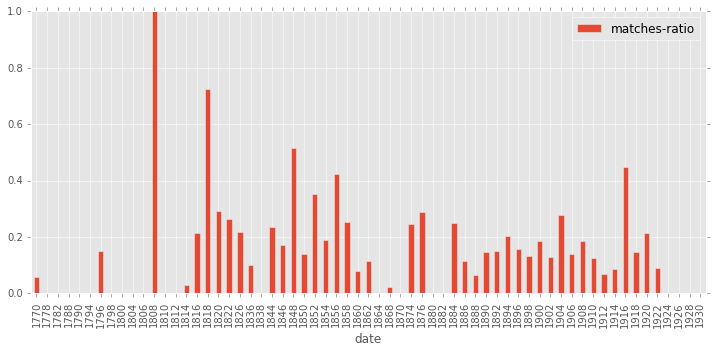

In [14]:
plotGroup(dfb, ['matches-ratio'])

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


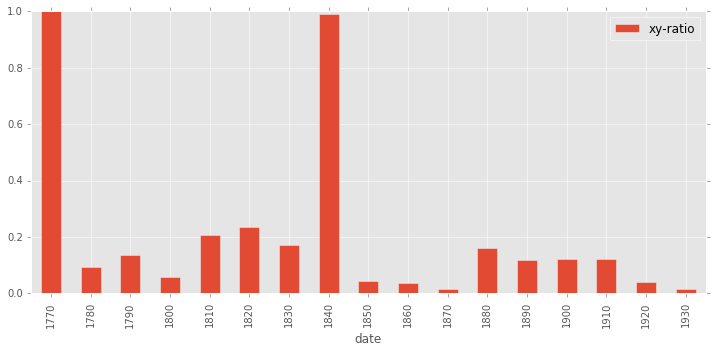

In [17]:
plotGroup(dfb, ['xy-ratio'], 10)

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


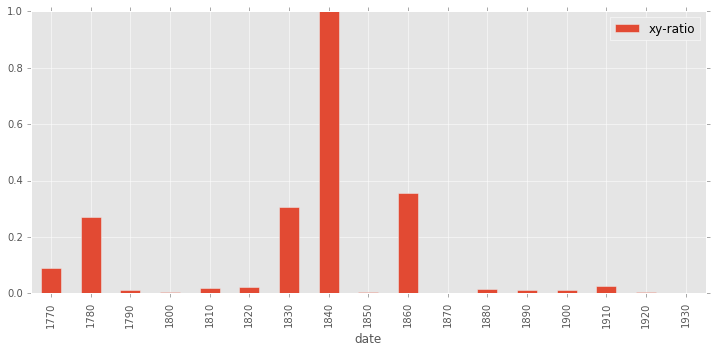

In [115]:
plotGroup(df, ['xy-ratio'], 10)

In [5]:
plotGroup(df)

NameError: name 'plotGroup' is not defined

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


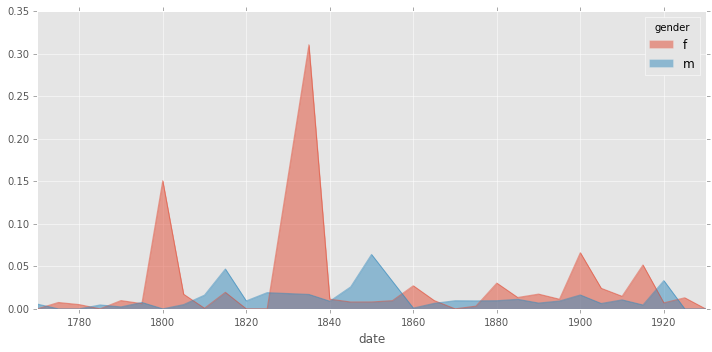

In [183]:
g = df.groupby(['gender', (df.index//5)*5]).mean()['clas-ratio']
g = g.unstack(level=0).fillna(0).plot(kind='area', stacked=False)

In [19]:
def plotDemographics(df, column, demographic, smoothing, save=False, filename=False): 
    grouped = df.groupby([demographic, (df.index//smoothing)*smoothing]).mean()
    normalize(grouped)
    grouped = grouped[column].unstack(level=0).fillna(0)
    ax = grouped.plot(kind='area', stacked=False)
    if save: 
        fig = ax.get_figure()
        filename = 'charts/' + filename + '.png'
        fig.savefig(filename)

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


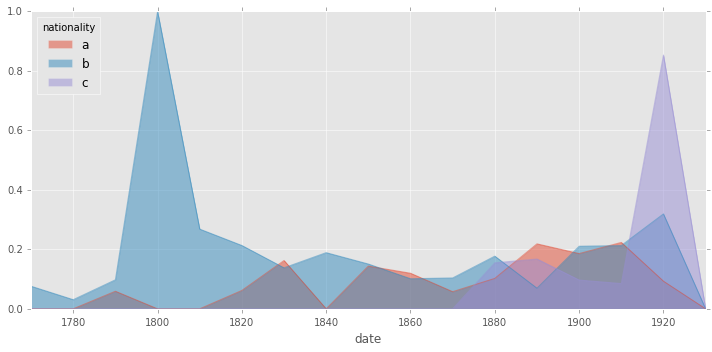

In [24]:
mb = plotDemographics(dfb, 'clas-ratio', 'nationality', 10)

/usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


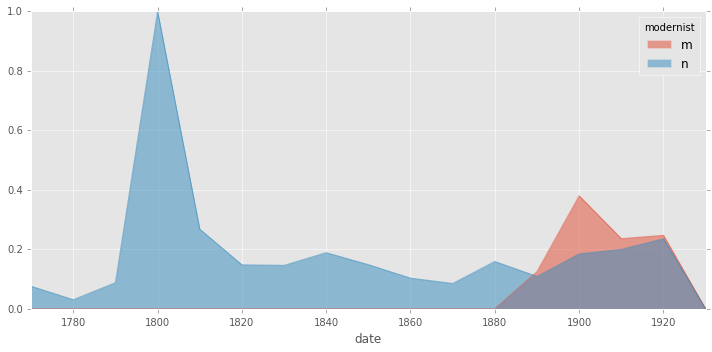

In [243]:
plotDemographics(dfb, 'clas-ratio', 'modernist', 10, save=True, filename='classical-modernist-dfb-10')

In [ ]:
# Old
dg = df.groupby(['gender'])
f, m = dg.get_group('f'), dg.get_group('m')
fdf, mdf = pd.DataFrame(f), pd.DataFrame(m)

dn = df.groupby(['nationality'])
a, b, c = dn.get_group('a'), dn.get_group('b'), dn.get_group('c')
adf, bdf, cdf = pd.DataFrame(a), pd.DataFrame(b), pd.DataFrame(c)

a, b, c = a.groupby('groupdate').mean(), b.groupby('groupdate').mean(), c.groupby('groupdate').mean()

f = f.groupby('groupdate').mean()
m = m.groupby('groupdate').mean()

def plotMF(m, f, column): 
    fig = plt.figure()
    plt.hold(True)
    female = f[column].plot(label='f')
    male = m[column].plot(label='m')
    plt.legend()

def plotABC(a, b, c, column): 
    fig = plt.figure()
    plt.hold(True)
    am = m[column].plot(label='American')
    brit = f[column].plot(label='British')
    can = c[column].plot(label='Canadian')
    plt.legend()